<a href="https://colab.research.google.com/github/anhhovn/kaggle/blob/main/amazon-dsbook-review/datascience_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files
uploaded = files.upload()

Saving final_book_dataset_kaggle.csv to final_book_dataset_kaggle (1).csv


The Amazon data science books dataset is achieved from Kaggle. This dataset has 946 samples/books.

In [24]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['final_book_dataset_kaggle.csv']))
df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


Questions:


1.   Do more expensive books have better reviews?
2.   Do longer books have higher prices?
3. What are the best Python books?
4. What are the best ML books?
5. Cluster analysis on book titles



# Nessesary libraries

In [21]:
import numpy as numpy
import matplotlib.pyplot as plt
import plotly.express as px
import re

# Wordcloud library

In [20]:
from wordcloud import WordCloud 
from sklearn.cluster import KMeans

# Exporatory analysis on DS books
## Price vs. reviews

In [26]:
px.scatter(df, x="price", y="avg_reviews", size= "n_reviews")

# Best Python books

In [31]:
# Select books based on title containing "Python"
python_books = df[df['title'].str.contains("Python")]

# 7 Python books with most reviews
best_python_books = python_books.nlargest(7, ["n_reviews","avg_reviews"])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


# Best Machine Learning Books

In [32]:
# Select books based on title containing "Python"
ml_books = df[df['title'].str.contains("Machine Learning")]

# 7 Python books with most reviews
best_ml_books = ml_books.nlargest(7, ["n_reviews","avg_reviews"])
best_ml_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


# Clustering book titles

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2)) 
X = vectorizer.fit_transform(df["title"])
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
  km = KMeans(n_clusters = k, max_iter = 600, n_init = 10)
  km.fit(X)
  sum_of_squared_distances.append(km.inertia_)

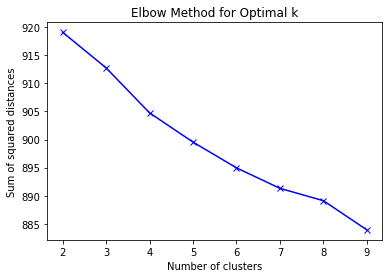

In [37]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [38]:
#Get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init = 10)
model.fit(X)

#Get prediction/labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title', 'cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
945                  Psychology Statistics For Dummies        0
845  AP Statistics Flashcards Fourth Edition: Up-to...        0
846  Outline of Basic Statistics: Dictionary and Fo...        0
847                           Essentials of Statistics        0
848  Statistics for People Who (Think They) Hate St...        0
..                                                 ...      ...
108  End-to-End Data Science with SASÂ®: A Hands-On...        5
101  Foundational Python for Data Science (Addison-...        5
100  Data Science In The Library: Tools and Strateg...        5
118  Data Visualization with Python for Beginners: ...        5
0    Becoming a Data Head: How to Think Speak and U...        5

[946 rows x 2 columns]


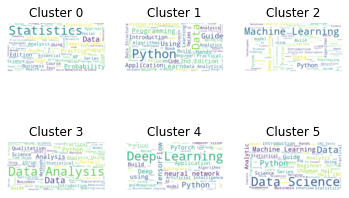

In [42]:
#create wordclouds for clusters
from wordcloud import WordCloud
for k in range(true_k):
  text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

  #create subplot
  plt.subplot(2, 3, k+1).set_title("Cluster " + str(k))
  plt.plot()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
plt.show()                                                                                            
                                                                            

# Scraping Amazon book reviews & Text summarization

In [44]:
# Example urls
product_url = df['complete_link'][0]

'https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/dp/1119741742/ref=sr_1_7?crid=1IWIG31DNPO6P&keywords=data+science&qid=1663447969&sprefix=data+science%2Caps%2C586&sr=8-7'

In [53]:
def get_review_url(product_url):
  try:
    split_url = product_url.split('dp')
    product_number = split_url[1].split('/')[1]
    review_url = split_url[0] + 'product-reviews/' + product_number +'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
  except:
    review_url = None
  return review_url

In [54]:
#Create review urls for each book in dataset
df['review_urls'] = df['complete_link'].apply(lambda x: get_review_url(x))

#Remove empty review urls and create a new dataset
df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [66]:
df_reviews['review_urls'][0]

'https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/product-reviews/1119741742/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

# Install Amazon Review Scraper

In [69]:
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
book_titles = df_reviews['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df_reviews['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

In [70]:
out

,review_text,review_stars,title
0,What is special about the book is the sequence...,5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
1,"IMHO, this is a really good overview of the da...",5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
2,In a world where data continues exponential gr...,5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
3,As someone enthusiastic about data and its pot...,5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
4,"First and foremost, I know the main author wel...",5.0 out of 5 stars,Becoming a Data Head: How to Think Speak and U...
...,...,...,...
4541,This is a plain-spoken book that is useful for...,4.0 out of 5 stars,Psychology Statistics For Dummies
4542,Very helpful book. I've never taken a statisti...,5.0 out of 5 stars,Psychology Statistics For Dummies
4543,Reading this book gave me a rather good overvi...,4.0 out of 5 stars,Psychology Statistics For Dummies
4544,"Even after a decade of stats training, I can s...",5.0 out of 5 stars,Psychology Statistics For Dummies


In [73]:
book_reviews = out

#Aggregate reviews for each book title
book_reviews['review_text'] = book_reviews['review_text'].astype(str)
book_reviews_agg = book_reviews.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
book_reviews_agg

,title,review_text
0,5 Steps to a 5: AP Statistics 2022,Needed this for an AP exam and it got here qui...
1,97 Things About Ethics Everyone in Data Scienc...,This is an easy read and covers most ethical a...
2,A Common-Sense Guide to Data Structures and Al...,As far as introducing the data structures this...
3,A First Course in Machine Learning (Chapman & ...,About as good a book you can learn from. This...
4,A Gentle Introduction to Stata,Book is for Stats 1 course. To compliment lab ...
...,...,...
630,Using Python for Principles of Econometrics,This computing help guide replicates fully in ...
631,Using SPSS for Windows and Macintosh (7th Edit...,This book walks you through pretty well. The a...
632,Violent Python: A Cookbook for Hackers Forensi...,A lot of security folks have little to no deve...
633,Web Scraping with Python: Collecting More Data...,This book is great and well written. You'd be ...


# Install Bert extractive summarizer

In [74]:
!pip install bert-extractive-summarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 7.6 MB/s 
     |████████████████████████████████| 163 kB 48.4 MB/s 
     |████████████████████████████████| 7.6 MB 30.3 MB/s 


In [ ]:
# Summarizing book reviews
from summarizer import Summarizer
bert_model = Summarizer()
bert_summary = ''.join(bert_model(book_reviews_agg.review_text[2], ratio = 0.2))
print(bert_summary)

In [78]:
from IPython.display import display, Markdown
display(Markdown(book_reviews_agg.review_text[2]))

As far as introducing the data structures this book takes a great visual approach. Algorithms are often easiest to understand in animated form but the step by step of this book is quite strong.The major weakness is by jumping between JS, Python, and Ruby you never fully develop any of them. Although the programmatic style is mostly translatable between these three languages it’s still typically better to do one thing fully rather than a few things partially. My feeling is that Ruby was the most represented of the three.All in all worth a read for the visualizations of the structures and algorithms. I was by no means “a beginner” when I picked up this book. But it’s also been 20 years since I learned anything DS&A. I picked this book over others mostly on a whim, but being geared towards beginners, I was at least assured that the subject material would fly over my head.So don’t get me wrong, this is a fantastic, educational book. My complaint is against how the author chose to interject his explanation of the code. My feeling is that he’s taken away part of the book for those like me who don’t need (and can’t stand) highly-commented code. Heck, I’m okay if there were just a few, well-worded, well-placed comments that gave reasons for unclear aspects of the code. But at about a quarter through, I stopped trying to read too much of the code. It just gave me a headache trying to parse code from comments. When it’s all “black and white,” it just blurs together.Then, once you’re done trying to find the code amongst the comments, realize it’s maybe 6 lines of code, he says, “This code is not trivial, so let’s break it down.” Dude. You already did that. In the middle of the code. Using comments. And also. My man. Six lines is very nearly the _exact_ meaning of trivial. Non-trivial is when you need to create classes and use _actual_ programming techniques of architecture and design. Not writing 6 lines of code that you didn’t even write tests for because you’re not the first person to write it that way, in that language.So if you can get past the frustration involved with that aspect, the actual DS&A part is amazingly good and easy to understand. I’ve recommended the book on more than one occasion; I only mention the code comments when I think it’ll benefit the person to whom I’m recommending the book.I would certainly enjoy a second, less beginner-focused version that maybe expands on the concepts, or even repeats some with more succinct code/comments. Got this book on a recommendation to help with the class that I’ve been struggling in have not finished it yet, but so far it’s helping me understand data structures much better I have read 7-9 books on this subject, majority are difficult to understand thus hard for the concepts to stick inside my brain.This book is the opposite, easy to read, by that I mean, concepts are explained in simple terms with walk through examples, along with visual examples, makes it easy to grasp, thus I now understand it, recursion now demystified, this book speaks my language,  highly recommend this book to anyone, whether you are starting out or looking for a primer. I can't say enough good things about this book. The author writes in everyday language so these concepts are so much more easily understood than any other resources I've found. This book is perfect for someone like me who does not have a strong mathematics or computer science background. I started a job as a dev and am going back to learn some CS fundamentals, and this is absolutely the best place you can start. If you're looking for a DSA book that is easy to understand and worth your time, THIS IS IT! If you're coming from a non-CS background, this is the book you want. I rarely think a book deserves 5 stars, but the author did an amazing job.In my journey to becoming a self taught software engineer, I found this book only after 3 years of working professionally, and I STILL gained a alot if value out of it, namely filling some gaps that may have still been present in my makeshift education.That's said, even if you are brand new, this is still the book you want, and I wish I found it years ago! I only got this book because others suggested it. Even though most code is written in python, pearl, and JavaScript the code is readable to the point that you can comprehend the examples and can replicate them using your preferred programming language. For example, I use mostly Kotlin and Java and as long as you understand basic programming syntax, then it’s straightforward.Honestly this book made me not afraid of data structures. I used to avoid studying them, but now I feel like I was worried more because of “big words” instead of the data structures.Thanks for writing this book! It gave me confidence to learn deeper topics. By the way, I think step by step details were so good. Most books force you to assume steps from beginning to end, but you actually show each step. Even though it cost a lot of ink to print each step haha, it is so worth it in terms of visualizing a complex/new concept. I don’t have a very intensive training for DSA but this book gives a very detailed explanation of concepts that is easily digestible to the brain. The book has a good logical flow.  It presents a lot of great concepts in a fairly easy to digest way.My bone to pick is the fact that most of the examples are given in Ruby.  I personally don’t use Ruby, and the syntax is so different compared to any of the more popular languages (Java, C, C++ even Python) that it can be hard at times to decipher what the code is doing and than subsequently translate that to the language of your choosing.  Some examples are given in Python which is sensible, and if the whole book used Python I’d have no issues translating the exercises to a new language.This honestly might just be a shortcoming on my part but I wouldn’t recommend this book if you don’t regularly use Ruby or don’t already understand the concepts being taught and how to implement them. This is a great book that's goes into details with examples and great illustrations. I highly recommend if you would like to brush up on Algorithms and Data Structures.

In [79]:
display(Markdown(bert_summary))

As far as introducing the data structures this book takes a great visual approach. My feeling is that Ruby was the most represented of the three. All in all worth a read for the visualizations of the structures and algorithms. But it’s also been 20 years since I learned anything DS&A. I picked this book over others mostly on a whim, but being geared towards beginners, I was at least assured that the subject material would fly over my head. Heck, I’m okay if there were just a few, well-worded, well-placed comments that gave reasons for unclear aspects of the code. It just gave me a headache trying to parse code from comments. Then, once you’re done trying to find the code amongst the comments, realize it’s maybe 6 lines of code, he says, “This code is not trivial, so let’s break it down.” This book is the opposite, easy to read, by that I mean, concepts are explained in simple terms with walk through examples, along with visual examples, makes it easy to grasp, thus I now understand it, recursion now demystified, this book speaks my language,  highly recommend this book to anyone, whether you are starting out or looking for a primer. This book is perfect for someone like me who does not have a strong mathematics or computer science background. I personally don’t use Ruby, and the syntax is so different compared to any of the more popular languages (Java, C, C++ even Python) that it can be hard at times to decipher what the code is doing and than subsequently translate that to the language of your choosing.